In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import scipy.signal as signal

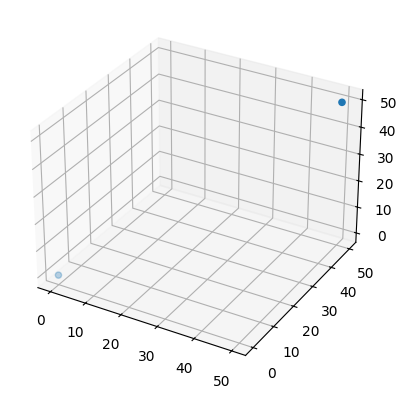

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
x = np.arange(200).reshape(2,2,50)
y = np.arange(200).reshape(2,2,50)
z = np.arange(200).reshape(2,2,50)
marker_sizes = np.array([20, 50])  # Marker sizes for each point

# Create a scatter plot with different sized markers using plt.plot()
#ax.plot(x, y, 'o', markersize=1, color='blue', alpha=0.7, markeredgecolor='black', linewidth=0.5)
scat = ax.scatter(x[:, 0], y[:, 0], z[:, 0], s=marker_sizes[0])
#scat = [ax.scatter(x[mind, 0], y[mind, 0], z[mind, 0], s=marker_sizes[mind]) for mind in range(2)]

In [22]:
def update(step):
    #for mind in range(2):
    #    nx, ny, nz = x[mind, step], y[mind, step], z[mind, step]
    #    scat[mind]._offsets3d = (x+step, y+step, z+step)

    scat._offsets3d = (x[:, step], y[:,step], z[:,step])

In [23]:
ani = animation.FuncAnimation(fig, update, frames=10, interval=1)


In [24]:
writergif = animation.PillowWriter(fps=30) 
ani.save(f"./test_animation.gif", writer=writergif)


In [3]:
def fit_cheby_to_hann(times, order=6):
    hwin = np.hanning(len(times))
    hann_cheb = np.polynomial.chebyshev.chebfit(times, hwin, order)
    return hann_cheb

In [4]:
def fit_cheby_to_tukey(times, alpha=0.5, order=6):
    hwin = signal.windows.tukey(len(times), alpha=alpha)
    tuk_cheb = np.polynomial.chebyshev.chebfit(times, hwin, order)
    return tuk_cheb

In [5]:
times = np.linspace(-1,1,1000)

In [6]:
alpha = 0.4
tuk_ch = fit_cheby_to_tukey(times, order=20, alpha=alpha)
tuk_val = np.polynomial.chebyshev.chebval(times, tuk_ch)

In [7]:
hann_ch = fit_cheby_to_hann(times, order=6)
hann_val = np.polynomial.chebyshev.chebval(times, hann_ch)

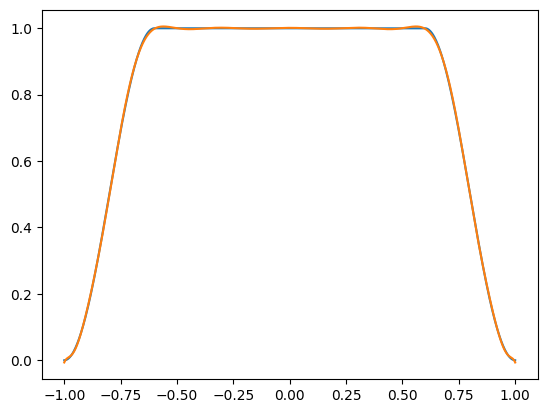

In [8]:
fig, ax = plt.subplots()
ax.plot(times, signal.windows.tukey(len(times), alpha=alpha))
ax.plot(times, tuk_val)

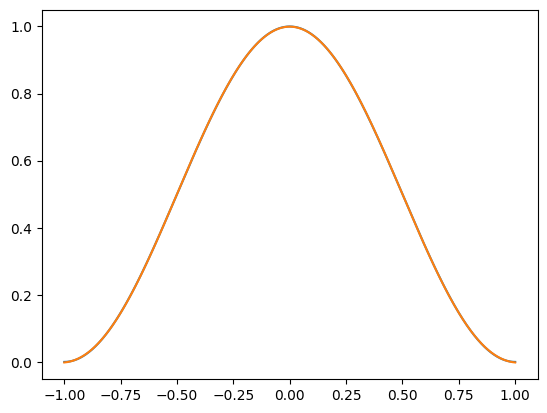

In [9]:
fig, ax = plt.subplots()
ax.plot(times, np.hanning(len(times)))
ax.plot(times, hann_val)

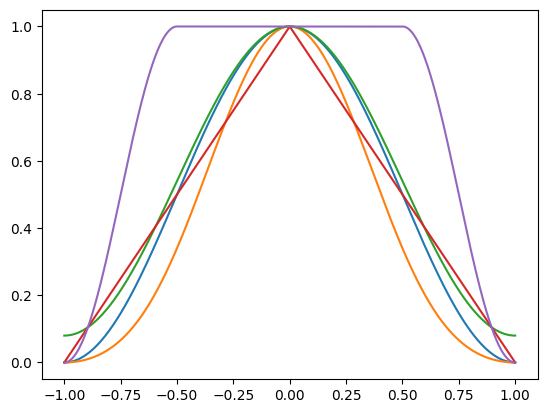

In [10]:
fig, ax = plt.subplots()
ax.plot(times, np.hanning(len(times)))
ax.plot(times, np.blackman(len(times)))
ax.plot(times, np.hamming(len(times)))
ax.plot(times, np.bartlett(len(times)))
ax.plot(times, signal.windows.tukey(len(times)))

In [10]:
tuk_ch

array([ 6.01025853e-01, -1.94395649e-16, -5.76404006e-01,  4.78771385e-16,
       -1.50754867e-01,  3.83753051e-16,  8.62354899e-02, -6.53879148e-17,
        6.21255483e-02,  4.96976060e-16, -1.53715951e-02,  2.05199404e-17,
       -1.73342474e-02,  1.36317801e-16,  6.90692710e-03,  4.38672821e-16,
        3.90650977e-03, -1.88349210e-16, -5.31068291e-03,  2.98468553e-16,
       -1.66218424e-03])

In [11]:
window_coeffs = hann_ch
#window_coeffs = np.array([ 3.47821791e-01,  1.52306260e-16, -4.85560481e-01, -5.11827799e-17, 1.51255010e-01,  2.65316279e-17, -1.48207898e-02])

coeffs = np.random.uniform(-1,1,10)
xval = np.polynomial.chebyshev.chebval(times, coeffs)
# find the acceleration components for each dimension
co_x_acc = np.polynomial.chebyshev.chebder(coeffs, m=2)
acc = np.polynomial.chebyshev.chebval(times, co_x_acc)

co_x_vel = np.polynomial.chebyshev.chebder(coeffs, m=1)
vel = np.polynomial.chebyshev.chebval(times, co_x_vel)

# window each dimension in acceleration according to hann window
win_co_x_acc = np.polynomial.chebyshev.chebmul(co_x_acc, window_coeffs)
win_acc = np.polynomial.chebyshev.chebval(times, win_co_x_acc)

win_co_x_vel = np.polynomial.chebyshev.chebint(win_co_x_acc, m=1)
win_vel = np.polynomial.chebyshev.chebval(times, win_co_x_vel)
win_co_x_vel[0] -= np.mean(win_vel)
win_vel2 = np.polynomial.chebyshev.chebval(times, win_co_x_vel)

# integrate the windowed acceleration twice to get position back
win_co_x = np.polynomial.chebyshev.chebint(win_co_x_vel, m=1)
win_xval = np.polynomial.chebyshev.chebval(times, win_co_x)
win_co_x[0] -= np.mean(win_xval)
win_xval2 = np.polynomial.chebyshev.chebval(times, win_co_x)



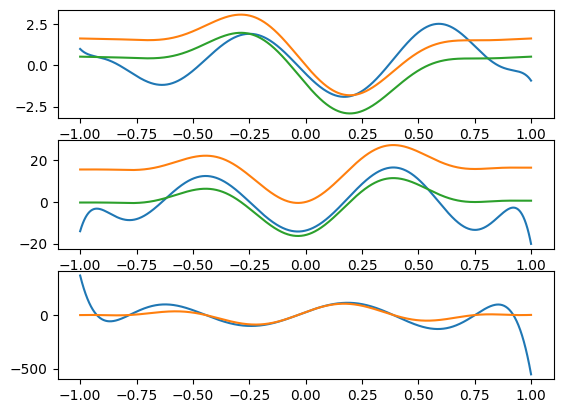

In [12]:
fig, ax = plt.subplots(nrows=3)
ax[0].plot(times, xval)
ax[0].plot(times, win_xval)
ax[0].plot(times, win_xval2)

ax[1].plot(times, vel)
ax[1].plot(times, win_vel)
ax[1].plot(times, win_vel2)

ax[2].plot(times, acc)
ax[2].plot(times, win_acc)

# Polynomials Test

In [16]:
# chebyshev

coeffs = np.random.uniform(-1,1,10)
xval = np.polynomial.chebyshev.chebval(times, coeffs)
# find the acceleration components for each dimension
co_x_acc = np.polynomial.chebyshev.chebder(coeffs, m=2)
acc = np.polynomial.chebyshev.chebval(times, co_x_acc)

co_x_vel = np.polynomial.chebyshev.chebder(coeffs, m=1)
vel = np.polynomial.chebyshev.chebval(times, co_x_vel)

# chebyshev

hxval = np.polynomial.hermite.hermval(times, coeffs)
# find the acceleration components for each dimension
hco_x_acc = np.polynomial.hermite.hermder(coeffs, m=2)
hacc = np.polynomial.hermite.hermval(times, hco_x_acc)

hco_x_vel = np.polynomial.hermite.hermder(coeffs, m=1)
hvel = np.polynomial.hermite.hermval(times, hco_x_vel)

lxval = np.polynomial.legendre.legval(times, coeffs)
# find the acceleration components for each dimension
lco_x_acc = np.polynomial.legendre.legder(coeffs, m=2)
lacc = np.polynomial.legendre.legval(times, lco_x_acc)

lco_x_vel = np.polynomial.legendre.legder(coeffs, m=1)
lvel = np.polynomial.legendre.legval(times, lco_x_vel)

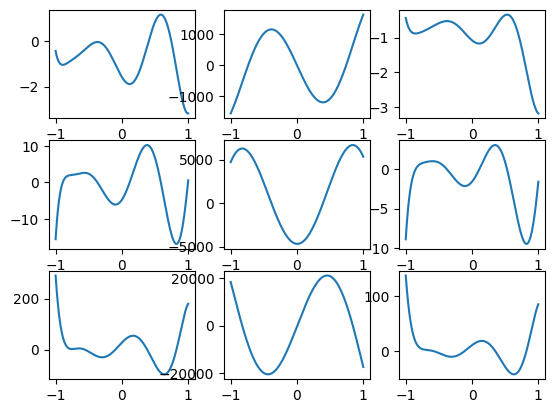

In [17]:
fig, ax = plt.subplots(nrows = 3, ncols = 3)
ax[0,0].plot(times, xval)
ax[0,1].plot(times, hxval)
ax[0,2].plot(times, lxval)

ax[1,0].plot(times, vel)
ax[1,1].plot(times, hvel)
ax[1,2].plot(times, lvel)

ax[2,0].plot(times, acc)
ax[2,1].plot(times, hacc)
ax[2,2].plot(times, lacc)

In [3]:
x = np.linspace(-10,10,100)
y = x / (1 + abs(x / 1.0))

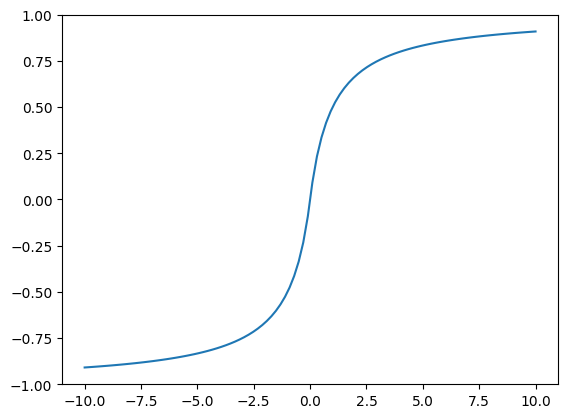

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y)